In [1]:
import os
import pandas as pd
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Data

In [2]:
df = pd.read_csv("../../data/cleaned_jetblue_df.csv")

df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,a291a2b5ac19223c3407cfec58d1fc24,2022-04-16,2022-04-17,ATL,CLT,VH0AUEL1,PT8H48M,0,False,False,...,1650216180||1650238380,2022-04-17T13:23:00.000-04:00||2022-04-17T19:3...,BOS||CLT,ATL||BOS,JetBlue Airways||JetBlue Airways,B6||B6,||Embraer 190,9480||8880,947||728,coach||coach
1,d53bcf9e8b6523fa2de9420d7cb22196,2022-04-16,2022-04-17,ATL,DTW,RH0AUEL1,PT5H8M,0,False,False,...,1650244380||1650254280,2022-04-17T21:13:00.000-04:00||2022-04-17T23:5...,JFK||DTW,ATL||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Embraer 190||Embraer 190,8580||7680,762||485,coach||coach
2,5bb138f39804320ece767e747608a50e,2022-04-16,2022-04-17,ATL,EWR,VC0QBEL1,PT2H9M,0,False,False,...,1650202740,2022-04-17T09:39:00.000-04:00,EWR,ATL,JetBlue Airways,B6,Embraer 190,7740,762,coach
3,8201f75d221c7aa5b78f3b7781166032,2022-04-16,2022-04-17,ATL,JFK,RC0ABEL1,PT2H15M,0,False,False,...,1650208500,2022-04-17T11:15:00.000-04:00,JFK,ATL,JetBlue Airways,B6,Airbus A320,8100,762,coach
4,a63591f2b4df39d809c4a45a3898e122,2022-04-16,2022-04-17,ATL,JFK,RC0ABEL1,PT2H23M,0,False,False,...,1650244380,2022-04-17T21:13:00.000-04:00,JFK,ATL,JetBlue Airways,B6,Embraer 190,8580,762,coach


In [3]:
df[["searchDate", "flightDate", "elapsedDays"]]

,searchDate,flightDate,elapsedDays
0,2022-04-16,2022-04-17,0
1,2022-04-16,2022-04-17,0
2,2022-04-16,2022-04-17,0
3,2022-04-16,2022-04-17,0
4,2022-04-16,2022-04-17,0
...,...,...,...
6715942,2022-10-05,2022-11-12,1
6715943,2022-10-05,2022-11-12,0
6715944,2022-10-05,2022-11-12,0
6715945,2022-10-05,2022-11-12,0


In [4]:
df["elapsedDays"].unique()

array([0, 1])

:::NOTE:::

`elapsedDays` is a binary representation of something. It may pertain to the global elapsed days between flights. Dirt to be removed in all honestly. But this is just an assumption. 

In [5]:
sorted(df.columns)

['baseFare',
 'destinationAirport',
 'elapsedDays',
 'fareBasisCode',
 'flightDate',
 'isBasicEconomy',
 'isNonStop',
 'isRefundable',
 'legId',
 'searchDate',
 'seatsRemaining',
 'segmentsAirlineCode',
 'segmentsAirlineName',
 'segmentsArrivalAirportCode',
 'segmentsArrivalTimeEpochSeconds',
 'segmentsArrivalTimeRaw',
 'segmentsCabinCode',
 'segmentsDepartureAirportCode',
 'segmentsDepartureTimeEpochSeconds',
 'segmentsDepartureTimeRaw',
 'segmentsDistance',
 'segmentsDurationInSeconds',
 'segmentsEquipmentDescription',
 'startingAirport',
 'totalFare',
 'totalTravelDistance',
 'travelDuration']

# Route Searches in DF

In [6]:
["startingAirport", "destinationAirport"]

['startingAirport', 'destinationAirport']

In [7]:
## Groups the routes by start, destination, and count of the pairing. 
num_of_distinct_routes_df = df.groupby(["startingAirport", "destinationAirport"]).size().reset_index(name="count")

## Sorts out the information
sorted_distinct_route_df = num_of_distinct_routes_df.sort_values(by="count", ascending=False)



## Feature engineering unique plotting label
sorted_distinct_route_df["Route"] = sorted_distinct_route_df["startingAirport"] + "-" + sorted_distinct_route_df["destinationAirport"]

# sorted_distinct_route_df["bar_color"] = [x for x in sorted_distinct_route_df["Route"] if sorted_distinct_route_df["Route"].str.contain("JFK"):  else]

sorted_distinct_route_df

,startingAirport,destinationAirport,count,Route
93,JFK,LAX,144944,JFK-LAX
103,LAX,JFK,135097,LAX-JFK
117,LGA,ORD,129404,LGA-ORD
121,MIA,BOS,129401,MIA-BOS
99,LAX,BOS,125326,LAX-BOS
...,...,...,...,...
48,DEN,ORD,301,DEN-ORD
29,CLT,DFW,21,CLT-DFW
59,DFW,OAK,18,DFW-OAK
133,OAK,DFW,16,OAK-DFW


In [8]:
ny_df = sorted_distinct_route_df[
    (sorted_distinct_route_df["Route"].str.contains("JFK")) | #flying out of JFK
    (sorted_distinct_route_df["Route"].str.contains("LGA")) | #flying out of laguardia
    (sorted_distinct_route_df["Route"].str.contains("EWR"))   #flying out of newark
]

display(ny_df.head(100))

,startingAirport,destinationAirport,count,Route
93,JFK,LAX,144944,JFK-LAX
103,LAX,JFK,135097,LAX-JFK
117,LGA,ORD,129404,LGA-ORD
143,ORD,LGA,123730,ORD-LGA
88,JFK,BOS,121036,JFK-BOS
...,...,...,...,...
78,EWR,DEN,8798,EWR-DEN
44,DEN,EWR,6364,DEN-EWR
5,ATL,EWR,5625,ATL-EWR
75,EWR,ATL,4281,EWR-ATL


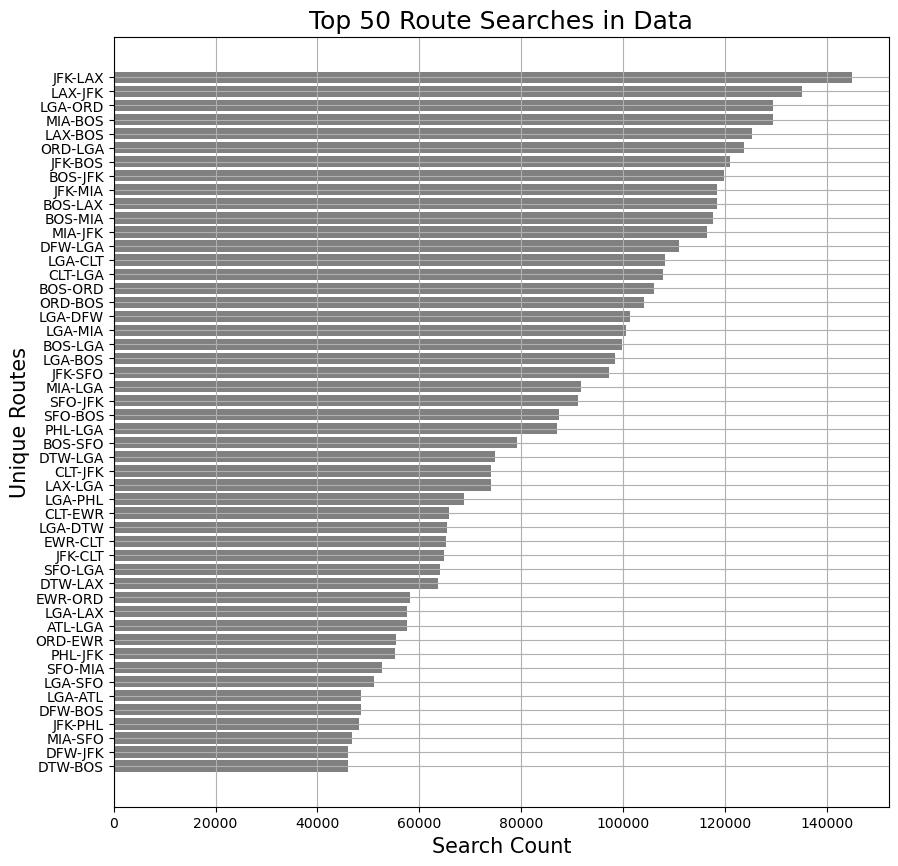

In [9]:
plt.figure(figsize=(10,10))

plt.gca().invert_yaxis()
plt.barh(sorted_distinct_route_df["Route"].head(50), sorted_distinct_route_df["count"].head(50), color="gray")

plt.title("Top 50 Route Searches in Data", size=18)
plt.ylabel("Unique Routes", size=15)
plt.xlabel("Search Count", size=15)
plt.grid(which="major")

# plt.show();

The data seems to have a heavy bias towards specific airports. This may fluctuate our model slightly.  

# Route Searches Over Time

To do route searches over time, I will need to construct something around what kinds of groupings we want to look at. This will involve aggregation and potentially timeseries adjustments for consistency. We'll do the aggregation first.

We will need `search_date`, `startingAirport`, `destinationAirport`

- make a filter of the distinct airports
- run through starting airport with the filter where it replaces anything outside of the filter as null
- run through the destination airport with the filter where it replaces anything out of the filter as a null. 
    - this will also be a good way to check if we have duplicate errored destinations. 
The timeseries plot can be displayed in two ways
    - dashed vs solid lines for arrival destination
    - colors designating the specific route



## Daily Searches

**Plot Setup**
-

In [17]:
def convert_to_datetime(date_string):
    try:
        return datetime.strptime(date_string, "%Y-%m-%d")
    except (TypeError, ValueError):
        return None

def search_date_timeseries(input_df):

    #plot_filters
    airport_filter = ["EWR", "LGA", "JFK"]


    ##plot_df instantiation
    plot_df = input_df[["searchDate", "startingAirport", "destinationAirport"]].copy()

    plot_df = plot_df[
    (plot_df["startingAirport"].isin(airport_filter)) |         #only starting airport
    (plot_df["destinationAirport"].isin(airport_filter))        #only destination airports
    ]                                                              

    plot_df["searchDate"] = plot_df["searchDate"].apply(convert_to_datetime)
    #TODO: double check we didn't destroy the integrity of this function for the sake of using datetime library (our stuff below operates on pandas datetime)
    # plot_df["searchDate"] = pd.to_datetime(plot_df["searchDate"], errors="coerce")

    plot_df["startingAirport"] = plot_df["startingAirport"].where(plot_df["startingAirport"].isin(airport_filter), np.nan)
    plot_df["destinationAirport"] = plot_df["destinationAirport"].where(plot_df["destinationAirport"].isin(airport_filter), np.nan)

    return plot_df

**STARTING AIRPORT**
-

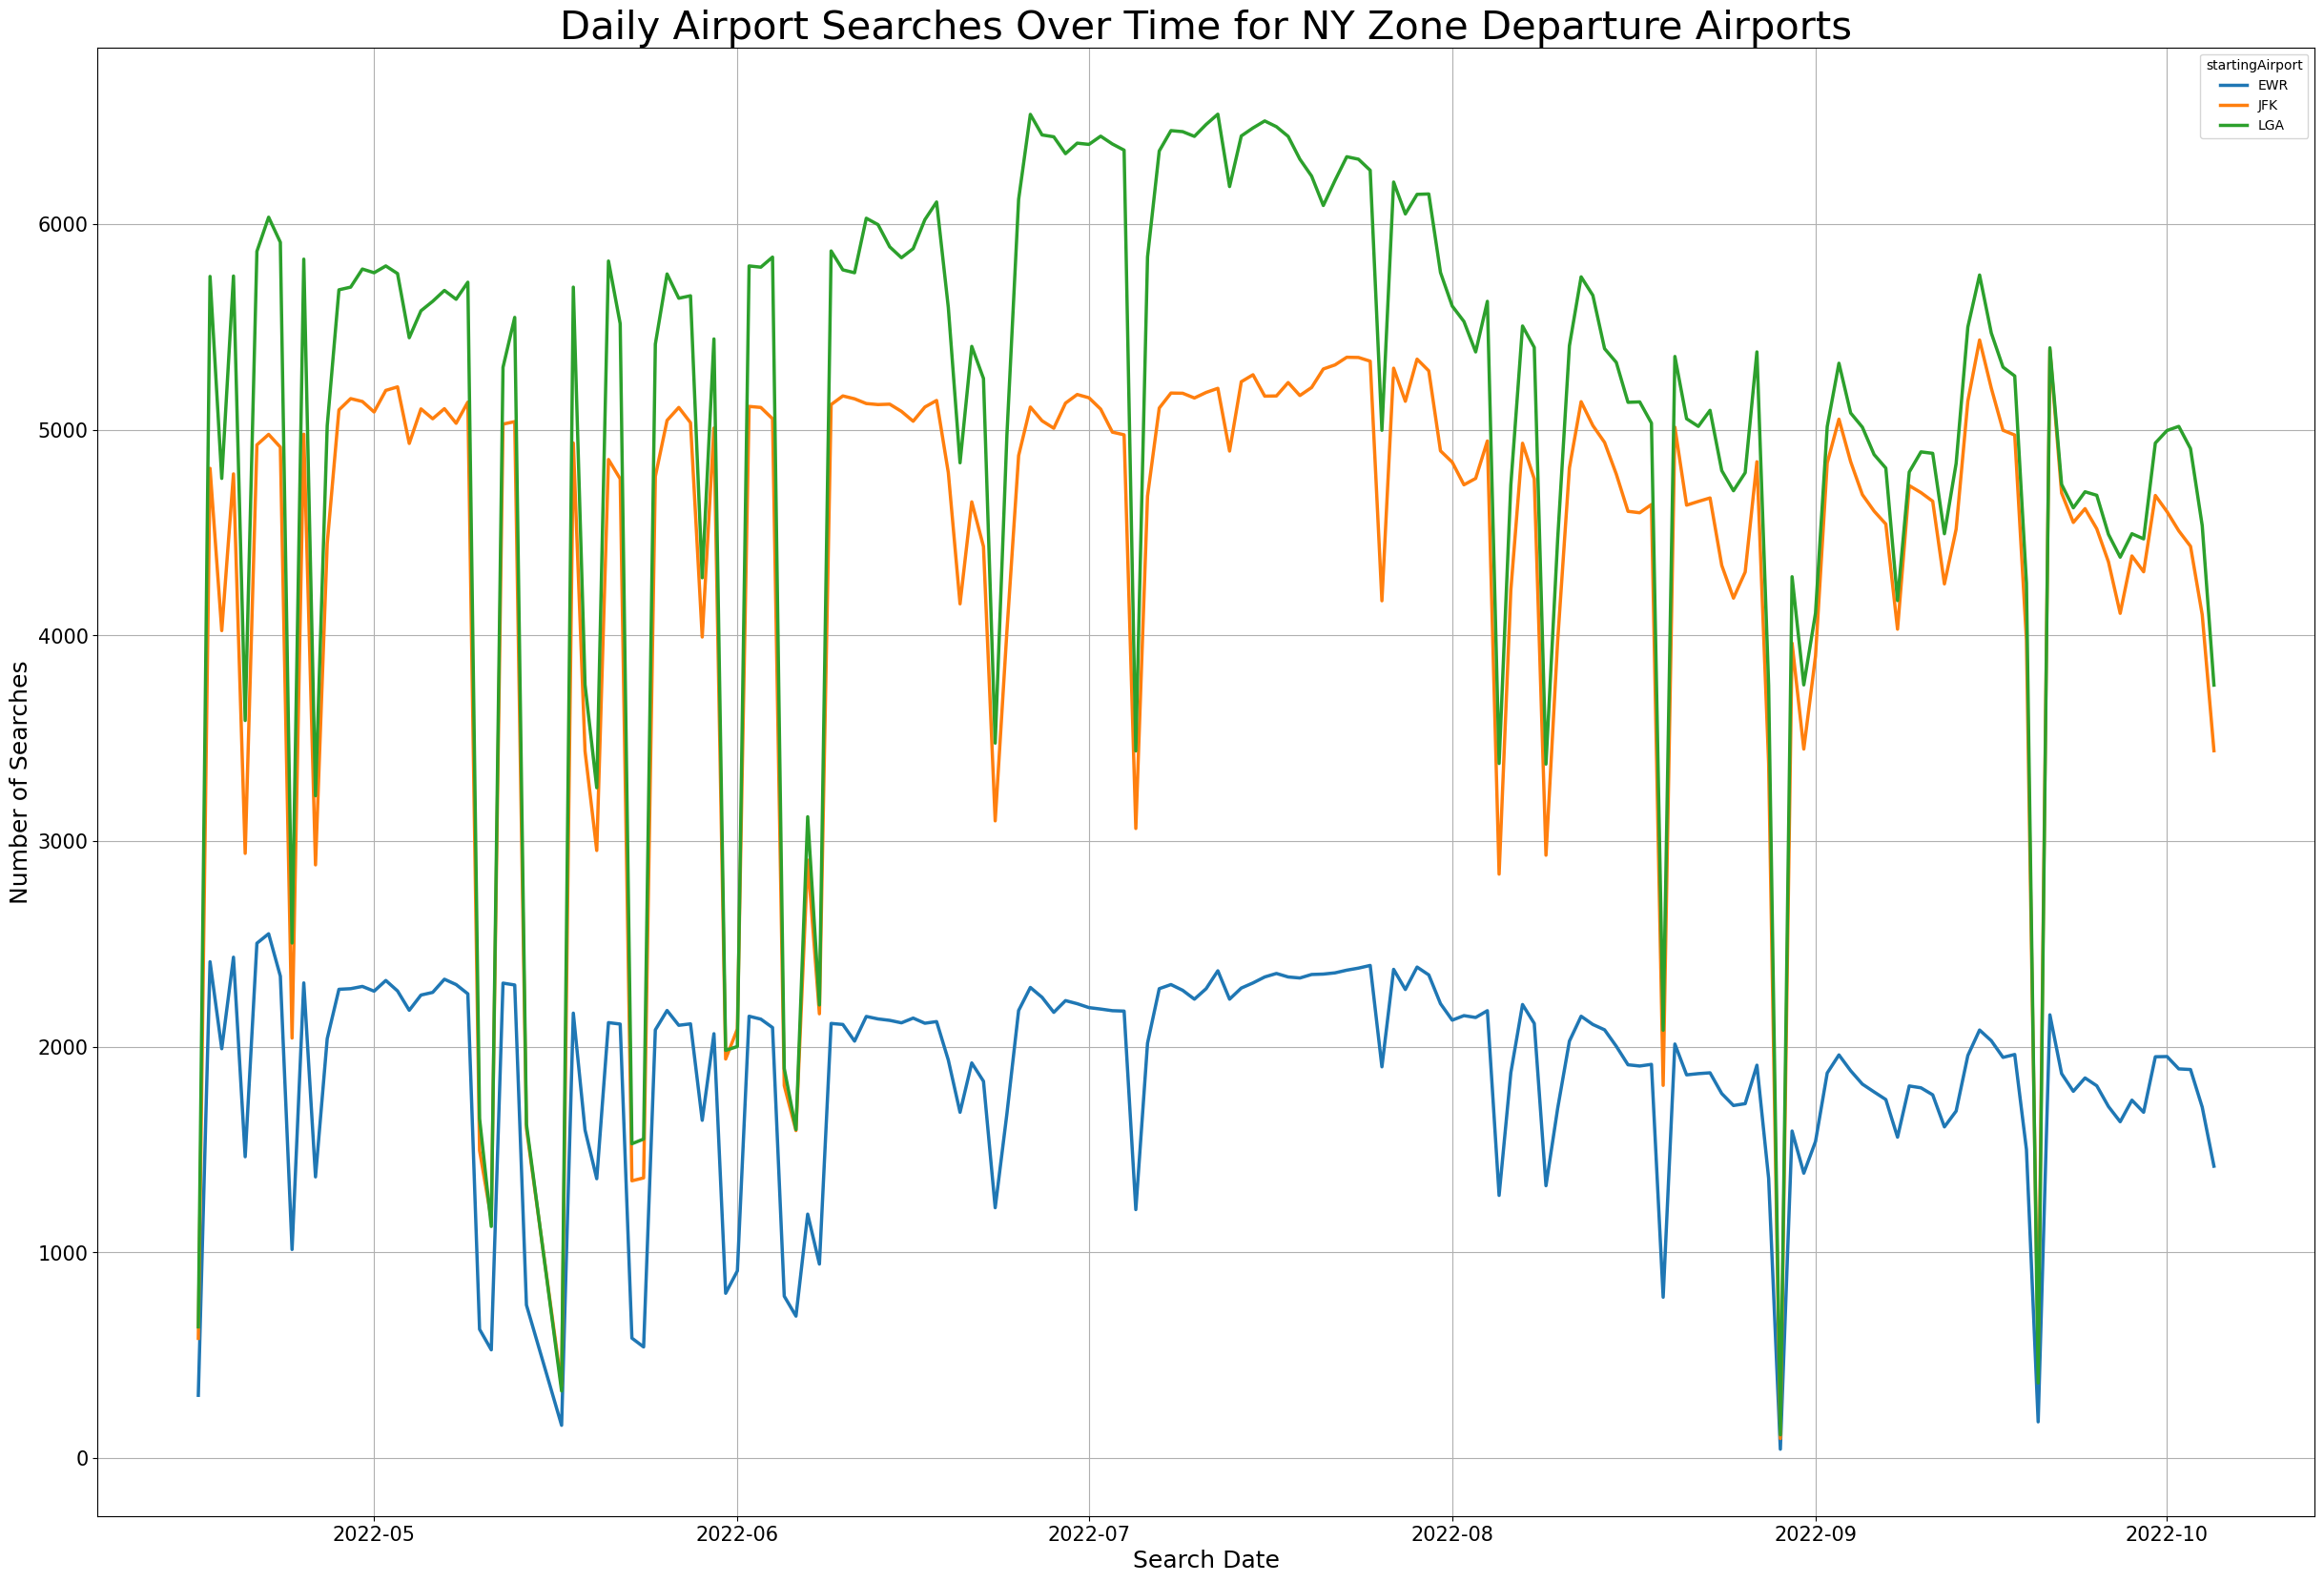

In [16]:
plot_df = search_date_timeseries(df)
airport_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]



plot_df = plot_df.groupby(["searchDate", "startingAirport"], dropna=False).size().reset_index(name="searchCount").sort_values("searchDate", ascending=True)



unique_combinations = plot_df["startingAirport"].unique()

full_date_range = pd.date_range(start=plot_df['searchDate'].min(), end=plot_df['searchDate'].max())
full_date_range = pd.date_range(start=plot_df['searchDate'].min(), end=plot_df['searchDate'].max())
plot_df["searchDate"] = pd.to_datetime(plot_df["searchDate"], errors="coerce")

complete_index = pd.MultiIndex.from_product([full_date_range, unique_combinations], names=["searchDate", "startingAirport"])
full_data = pd.DataFrame(index=complete_index).reset_index()
# display(complete_index)



merged_data = pd.merge(full_data, plot_df, on=["searchDate", "startingAirport"], how="left") #we do a merge of our global date range with our data based on similar keys
# display(merged_data)


#P#lotting
plt.figure(figsize=(30,20))

sns.lineplot(x=merged_data["searchDate"], y=merged_data["searchCount"], hue=merged_data["startingAirport"], palette=airport_colors, linewidth=2.5)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Search Date", size=18)
plt.ylabel("Number of Searches", size=18)
plt.title("Daily Airport Searches Over Time for NY Zone Departure Airports", size=30)
plt.grid(axis="both")

**DESTINATION AIRPORT**
-

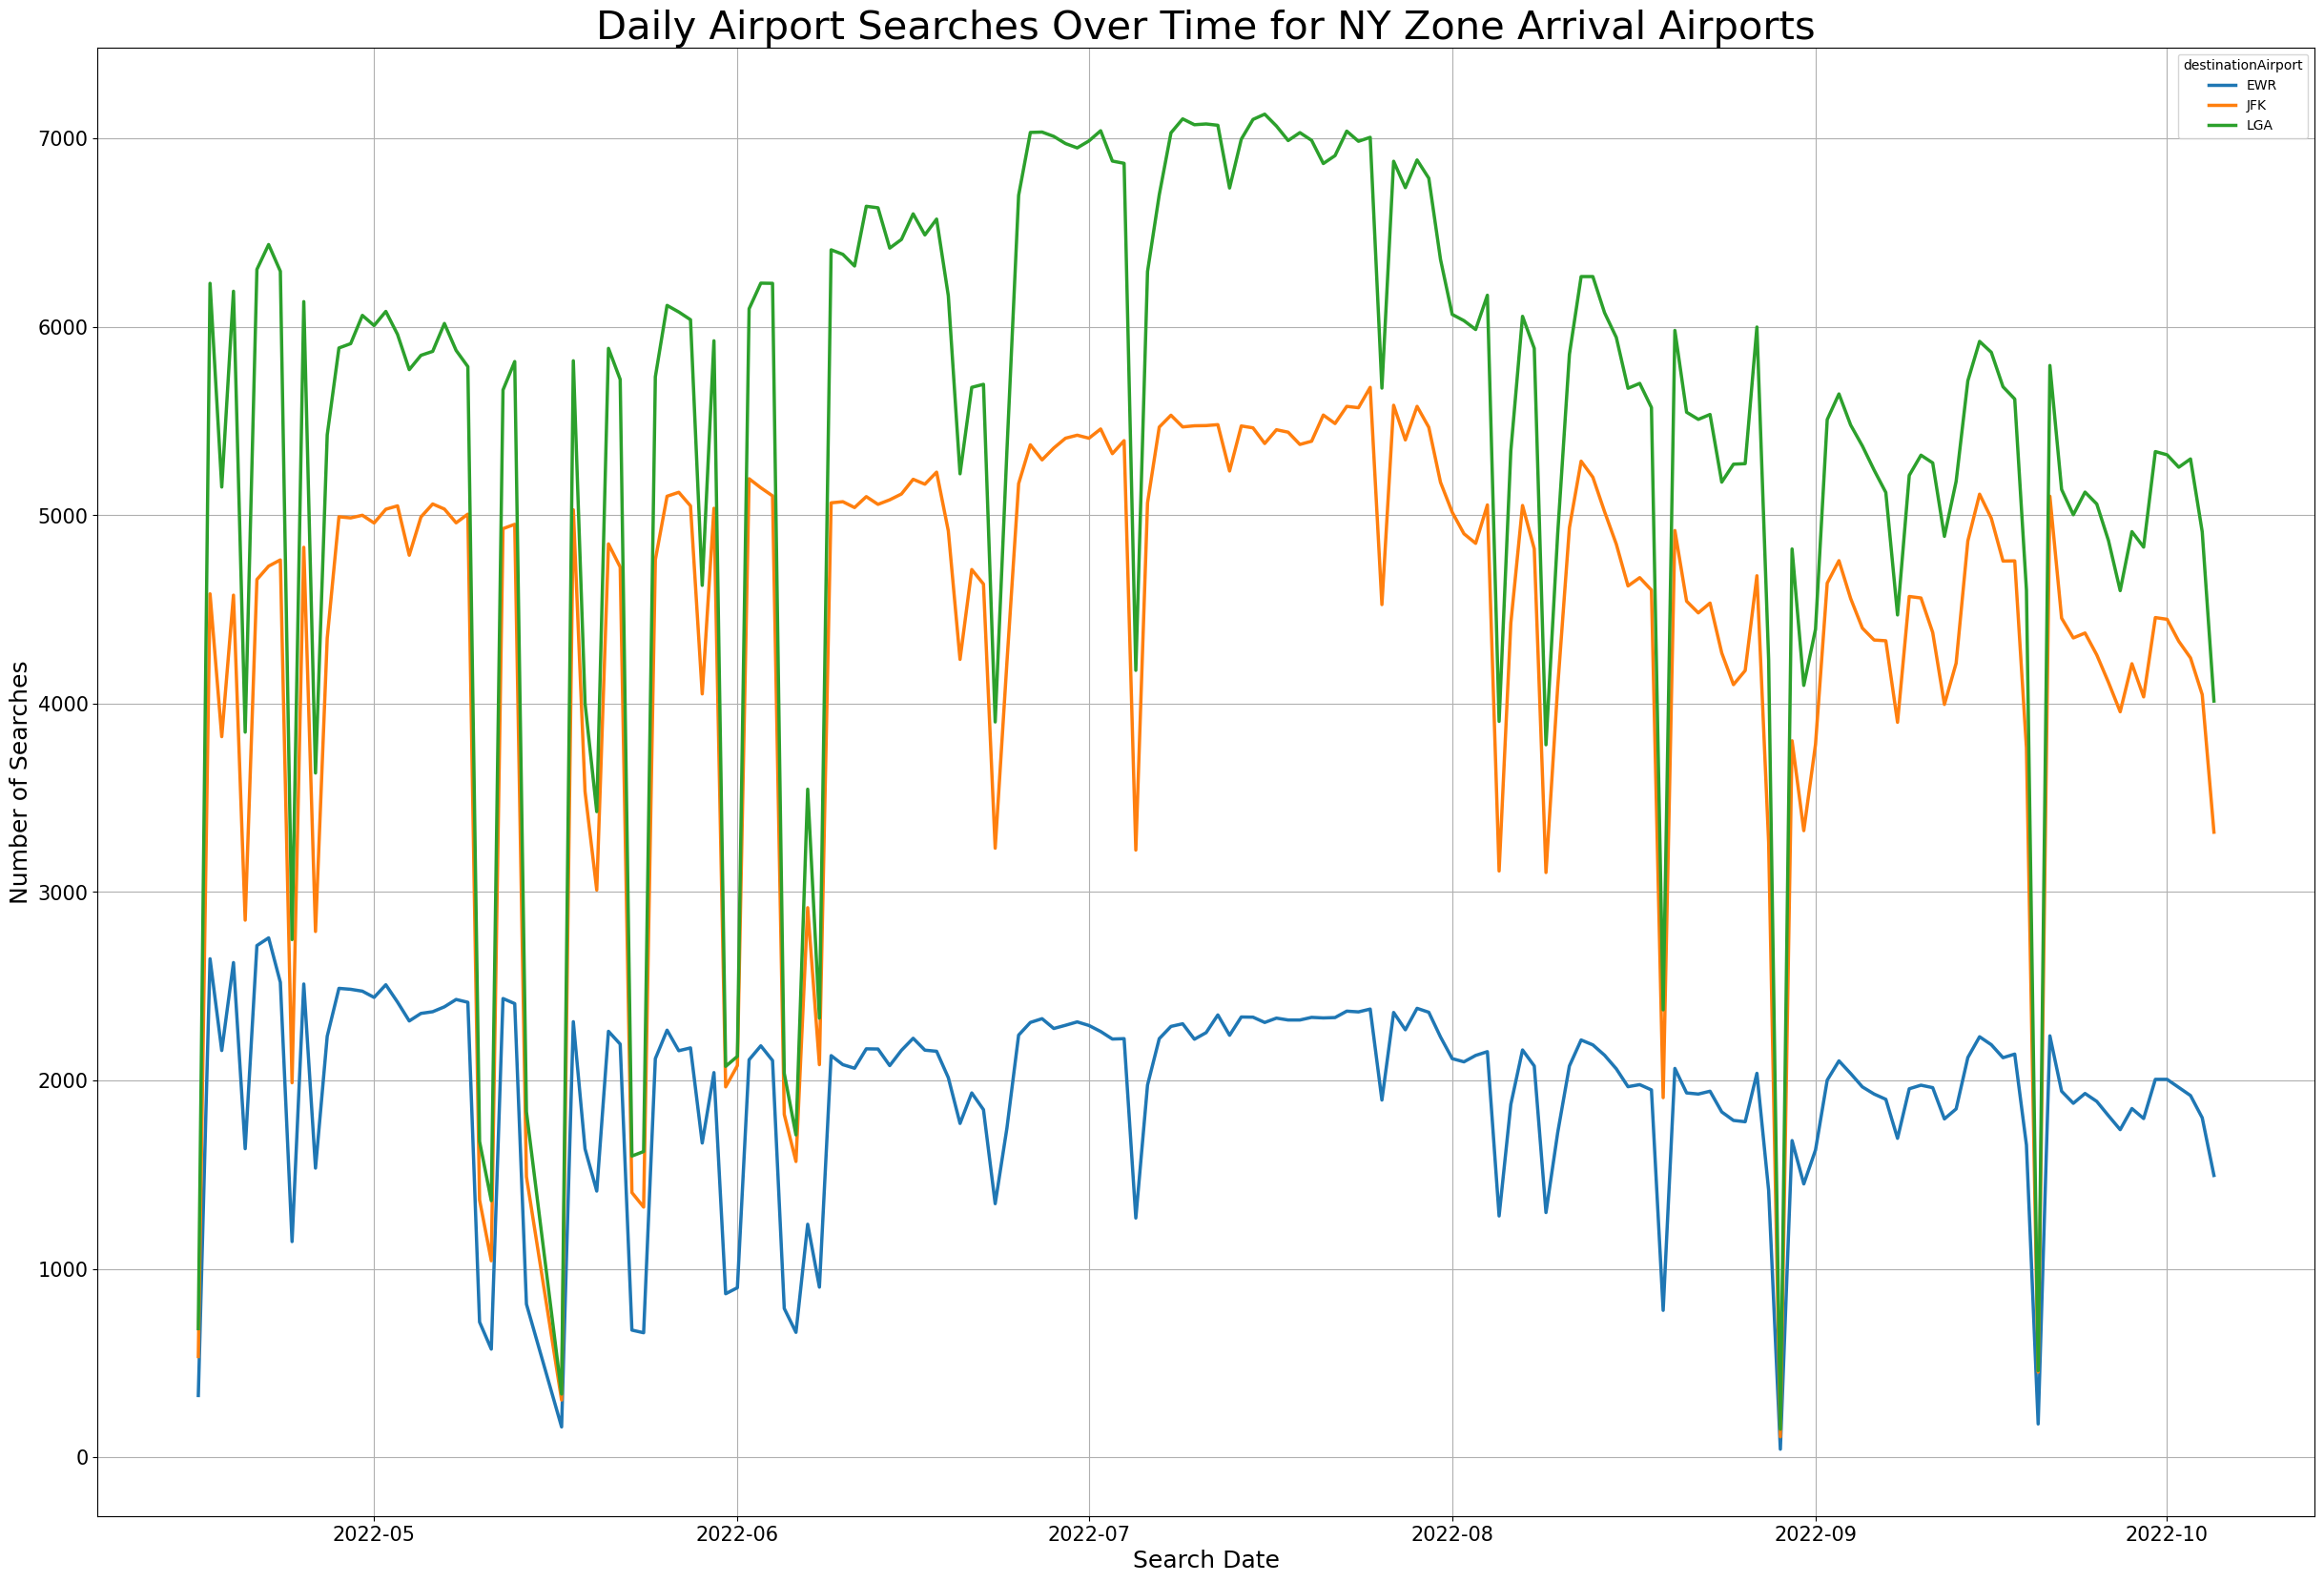

In [30]:
plot_df = search_date_timeseries(df)

plot_df = plot_df.groupby(["searchDate", "destinationAirport"], dropna=False).size().reset_index(name="searchCount").sort_values("searchDate", ascending=True)

unique_combinations = plot_df["destinationAirport"].unique()

full_date_range = pd.date_range(start=plot_df['searchDate'].min(), end=plot_df['searchDate'].max())
full_date_range = pd.date_range(start=plot_df['searchDate'].min(), end=plot_df['searchDate'].max())
plot_df["searchDate"] = pd.to_datetime(plot_df["searchDate"], errors="coerce")

complete_index = pd.MultiIndex.from_product([full_date_range, unique_combinations], names=["searchDate", "destinationAirport"])
full_data = pd.DataFrame(index=complete_index).reset_index()
# display(complete_index)

merged_data = pd.merge(full_data, plot_df, on=["searchDate", "destinationAirport"], how="left")
# display(merged_data)

plt.figure(figsize=(30,20))

sns.lineplot(x=merged_data["searchDate"], y=merged_data["searchCount"], hue=merged_data["destinationAirport"], palette=airport_colors, linewidth=2.5)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Search Date", size=18)
plt.ylabel("Number of Searches", size=18)
plt.title("Daily Airport Searches Over Time for NY Zone Arrival Airports", size=30)
plt.grid(axis="both")

So what I can also say about this here is that the most searches happen when LGA is a destination airport.This may or may not be important information. It may also show by a difference in magnitude per everything here. Or it can also be more consistent than all the other airport searches which may have different start dates and end dates.  

## Monthly Searches

To do monthly searches, I need to re-display the column to its month format. Wwe only have a few months. It may makle sense to find a way what a denotion of a week is. 

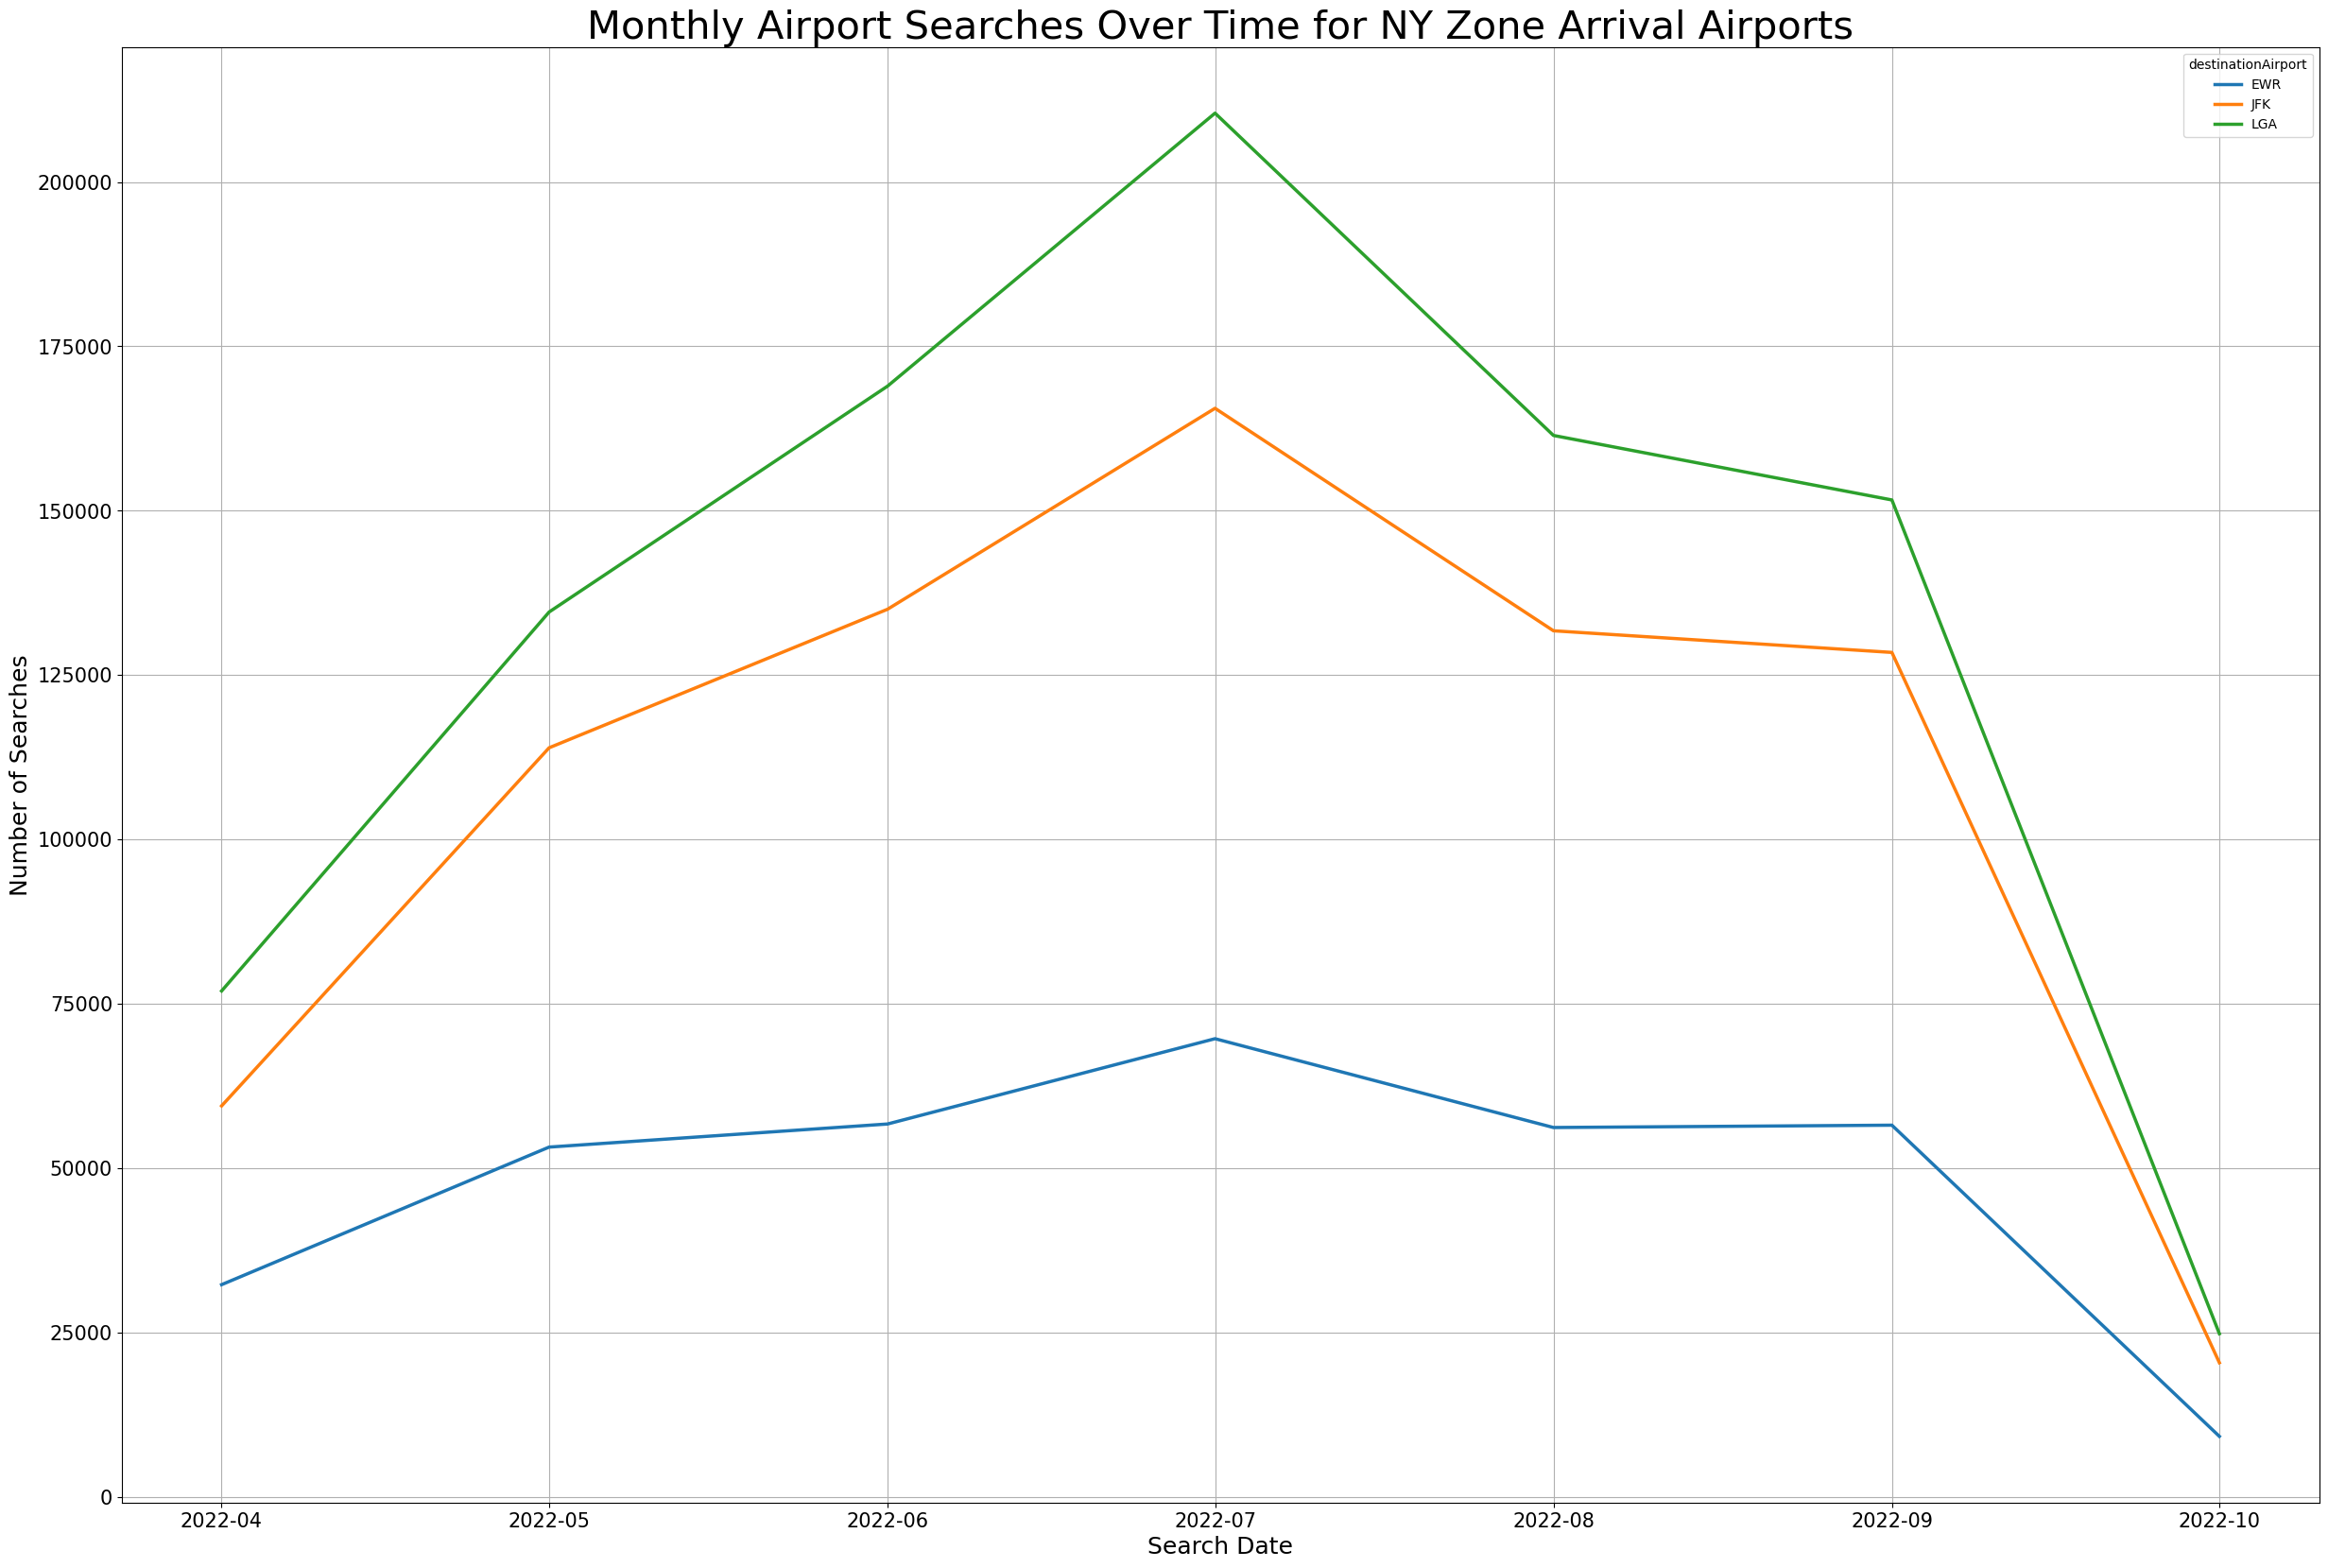

In [29]:
plot_df = search_date_timeseries(df)

# plot_df
# airport_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
    

#We pull the year and month out from here into a tuple represented object
plot_df["year_month"] = plot_df["searchDate"].apply(lambda x: (x.year, x.month) if x else None)

#we aggregate and group by here off of the year_month
aggregated_df = plot_df.groupby(["year_month", "destinationAirport"], dropna=False).size().reset_index(name="searchCount").sort_values("year_month", ascending=True)


#Generate a complete monthly range based on min and max dates
unique_airports = plot_df["destinationAirport"].unique()
min_date = min(plot_df["searchDate"])
max_date = max(plot_df["searchDate"])


# Create a list of all (year, month) pairs in the range
full_date_range = []

current_date = min_date.replace(day=1)  # Start at the first of the month
while current_date <= max_date:
    full_date_range.append((current_date.year, current_date.month))
    # Increment by one month
    if current_date.month == 12:
        current_date = current_date.replace(year=current_date.year + 1, month=1)
    else:
        current_date = current_date.replace(month=current_date.month + 1)

# Ensure all dates and airports have entries in the aggregated DataFrame
aggregated_df = (
    aggregated_df.set_index(["year_month", "destinationAirport"])
    .reindex(
        pd.MultiIndex.from_product(
            [full_date_range, unique_airports], names=["year_month", "destinationAirport"]
        ),
        fill_value=0
    )
    .reset_index()
)
aggregated_df["year_month"] = aggregated_df["year_month"].apply(lambda ym: datetime(ym[0], ym[1], 1))
# # Display result
# display(aggregated_df)


plt.figure(figsize=(30,20))

sns.lineplot(x=aggregated_df["year_month"], y=aggregated_df["searchCount"], hue=aggregated_df["destinationAirport"], palette=airport_colors, linewidth=2.5)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Search Date", size=18)
plt.ylabel("Number of Searches", size=18)
plt.title("Monthly Airport Searches Over Time for NY Zone Arrival Airports", size=30)
plt.grid(axis="both")




# full_date_range = pd.date_range(start=plot_df['searchDate'].min(), end=plot_df['searchDate'].max())
# full_date_range = pd.date_range(start=plot_df['searchDate'].min(), end=plot_df['searchDate'].max())
# plot_df["searchDate_year_month"] = pd.to_datetime(plot_df["searchDate"], errors="coerce")

# complete_index = pd.MultiIndex.from_product([full_date_range, unique_combinations], names=["searchDate", "destinationAirport"])
# full_data = pd.DataFrame(index=complete_index).reset_index()
# # display(complete_index)

# merged_data = pd.merge(full_data, plot_df, on=["searchDate", "destinationAirport"], how="left")

In [26]:
full_date_range

[(2022, 4), (2022, 5), (2022, 6), (2022, 7), (2022, 8), (2022, 9), (2022, 10)]

In [379]:
aggregated_df

,year_month,destinationAirport,searchCount
0,"(2022, 4)",EWR,32265
1,"(2022, 4)",JFK,59457
2,"(2022, 4)",LGA,76940
3,"(2022, 4)",NaN,163298
4,"(2022, 5)",EWR,53191
5,"(2022, 5)",JFK,113934
6,"(2022, 5)",LGA,134586
7,"(2022, 5)",NaN,293480
8,"(2022, 6)",EWR,56704
9,"(2022, 6)",JFK,135006


In [380]:
plot_df

,searchDate,startingAirport,destinationAirport,year_month
2,2022-04-16,NaN,EWR,"(2022, 4)"
3,2022-04-16,NaN,JFK,"(2022, 4)"
4,2022-04-16,NaN,JFK,"(2022, 4)"
5,2022-04-16,NaN,LGA,"(2022, 4)"
6,2022-04-16,NaN,LGA,"(2022, 4)"
...,...,...,...,...
6715928,2022-10-05,NaN,LGA,"(2022, 10)"
6715929,2022-10-05,NaN,LGA,"(2022, 10)"
6715930,2022-10-05,NaN,LGA,"(2022, 10)"
6715931,2022-10-05,NaN,LGA,"(2022, 10)"


**Plot Setup**
-

In [133]:
#this is just an aggregated count of combinations
route_combinations_count = working_df.groupby(["startingAirport", "destinationAirport"], dropna=False).size().reset_index(name="count").sort_values("count", ascending=False)

display(route_combinations_count)

,startingAirport,destinationAirport,count
6,NaN,LGA,928821
3,LGA,NaN,856452
5,NaN,JFK,754531
2,JFK,NaN,753360
4,NaN,EWR,333719
1,EWR,NaN,321937
0,EWR,LGA,3


In [132]:
working_df.groupby(["searchDate", "startingAirport"], dropna=False).size().reset_index(name="count").sort_values("count")

,searchDate,startingAirport,count
532,2022-08-29,EWR,43
533,2022-08-29,JFK,95
534,2022-08-29,LGA,113
116,2022-05-17,EWR,159
620,2022-09-20,EWR,176
...,...,...,...
343,2022-07-12,NaN,14899
355,2022-07-15,NaN,14901
391,2022-07-24,NaN,14920
387,2022-07-23,NaN,14985


In [126]:
starting_airport_df = working_df.groupby(["searchDate", "startingAirport"], dropna=False).size().reset_index(name="searchCount").sort_values("searchDate", ascending=True)

In [127]:
starting_airport_df

,searchDate,startingAirport,searchCount
0,2022-04-16,EWR,305
1,2022-04-16,JFK,582
2,2022-04-16,LGA,638
3,2022-04-16,NaN,1546
4,2022-04-17,EWR,2413
...,...,...,...
678,2022-10-04,LGA,4533
681,2022-10-05,JFK,3439
682,2022-10-05,LGA,3758
680,2022-10-05,EWR,1419


In [119]:
starting_airport_plot_filter = starting_airport_df["startingAirport"].dropna()

In [120]:
starting_airport_plot_filter

0      EWR
1      JFK
2      LGA
4      EWR
5      JFK
      ... 
677    JFK
678    LGA
681    JFK
682    LGA
680    EWR
Name: startingAirport, Length: 513, dtype: object

In [128]:
# starting_airport_plot_filter = starting_airport_df["startingAirport"].dropna()
starting_airport_plot_filter = working_df["startingAirport"].notna().reset_index(True)

plt.figure(figsize=(10,10))

sns.lineplot(x=starting_airport_df["searchDate"], y=starting_airport_df["searchCount"], hue="startingAirport")

# sns.lineplot(x=starting_airport_df[starting_airport_plot_filter]["searchDate"], y=starting_airport_df[starting_airport_plot_filter]["count"], hue=starting_airport_df[starting_airport_plot_filter]["startingAirport"])
# plt.title("Airport Searches over Time for Starting Airpport")

IndexError: Too many levels: Index has only 1 level, not 2

if element not in filter, then null
else: continue

In [68]:
working_df.groupby(["startingAirport", "destinationAirport"], dropna=False).size().reset_index(name="count").sort_values("count", ascending=False)

,startingAirport,destinationAirport,count
6,NaN,LGA,928821
3,LGA,NaN,856452
5,NaN,JFK,754531
2,JFK,NaN,753360
4,NaN,EWR,333719
1,EWR,NaN,321937
0,EWR,LGA,3


In [65]:
working_df[["startingAirport", "destinationAirport"]].value_counts().reset_index(name="count")

,startingAirport,destinationAirport,count
0,EWR,LGA,3


In [7]:
sorted(df.columns)

['baseFare',
 'destinationAirport',
 'elapsedDays',
 'fareBasisCode',
 'flightDate',
 'isBasicEconomy',
 'isNonStop',
 'isRefundable',
 'legId',
 'searchDate',
 'seatsRemaining',
 'segmentsAirlineCode',
 'segmentsAirlineName',
 'segmentsArrivalAirportCode',
 'segmentsArrivalTimeEpochSeconds',
 'segmentsArrivalTimeRaw',
 'segmentsCabinCode',
 'segmentsDepartureAirportCode',
 'segmentsDepartureTimeEpochSeconds',
 'segmentsDepartureTimeRaw',
 'segmentsDistance',
 'segmentsDurationInSeconds',
 'segmentsEquipmentDescription',
 'startingAirport',
 'totalFare',
 'totalTravelDistance',
 'travelDuration']

In [11]:

##This is cool for displaying how the annotatiions will work
for i, route in enumerate(routes):
    count = counts.iloc[i]

    #Check if JFK in route
    if "JFK" in route:
        #Split route into parts
        before, jfk, after = route.partition("JFK")
        print("------")
        print({count}, {i}, {before}, {jfk}, {after})
        

# plt.show();

------
{144944} {0} {''} {'JFK'} {'-LAX'}
------
{135097} {1} {'LAX-'} {'JFK'} {''}
------
{121036} {6} {''} {'JFK'} {'-BOS'}
------
{119818} {7} {'BOS-'} {'JFK'} {''}
------
{118523} {8} {''} {'JFK'} {'-MIA'}
------
{116494} {11} {'MIA-'} {'JFK'} {''}
------
{97162} {21} {''} {'JFK'} {'-SFO'}
------
{91216} {23} {'SFO-'} {'JFK'} {''}
------
{74169} {28} {'CLT-'} {'JFK'} {''}
------
{64883} {34} {''} {'JFK'} {'-CLT'}
------
{55318} {41} {'PHL-'} {'JFK'} {''}
------
{48248} {46} {''} {'JFK'} {'-PHL'}
------
{46016} {48} {'DFW-'} {'JFK'} {''}
